Importing Required Depedencies

In [36]:
#Importing the required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import mlxtend
import statistics as sm
from mlxtend.evaluate import mcnemar
from mlxtend.evaluate import mcnemar_table
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import shap

Loading and reading the required dataset

In [13]:
#Loading and reading the required dataset
data_set = pd.read_csv('/users/venya/Desktop/5300/NCI_SEER_CRC.csv')
data_set.head()

,Year of diagnosis,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)",Sex,Age recode with <1 year olds,Age recode with single ages and 100+,Primary Site - labeled,Grade (thru 2017),Combined Summary Stage (2004+),Total number of in situ/malignant tumors for patient,COD to site recode,Survival months,SEER registry (with CA and GA as whole states),Marital status at diagnosis,Appalachia,Behavior recode for analysis
0,2000,White,Non-Spanish-Hispanic-Latino,Male,80-84 years,82 years,C18.6-Descending colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,17,Kentucky,Married (including common law),1,Malignant
1,2000,White,Non-Spanish-Hispanic-Latino,Male,75-79 years,76 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Lung and Bronchus,67,Kentucky,Unknown,1,Malignant
2,2000,White,Non-Spanish-Hispanic-Latino,Female,65-69 years,65 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,41,Kentucky,Unknown,1,Malignant
3,2000,White,Non-Spanish-Hispanic-Latino,Male,85+ years,86 years,C18.4-Transverse colon,Poorly differentiated; Grade III,Blank(s),2,Lung and Bronchus,15,Kentucky,Unknown,1,Malignant
4,2000,White,Non-Spanish-Hispanic-Latino,Female,80-84 years,82 years,C18.3-Hepatic flexure of colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,0,Kentucky,Unknown,1,Malignant


Rename the columns

In [14]:
# Rename the columns
data_set = data_set.rename(columns={
    'Year of diagnosis': 'YDD',
    'Race recode (W, B, AI, API)': 'Race',
    'Age recode with single ages and 100+': 'Age',
    'Grade (thru 2017)': 'Grade',
    'SEER registry (with CA and GA as whole states)': 'Location',
    'Behavior recode for analysis': 'Diagnosis',
    'Marital status at diagnosis': 'MaritalStatus'
})
data_set.head()

,YDD,Race,"Origin recode NHIA (Hispanic, Non-Hisp)",Sex,Age recode with <1 year olds,Age,Primary Site - labeled,Grade,Combined Summary Stage (2004+),Total number of in situ/malignant tumors for patient,COD to site recode,Survival months,Location,MaritalStatus,Appalachia,Diagnosis
0,2000,White,Non-Spanish-Hispanic-Latino,Male,80-84 years,82 years,C18.6-Descending colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,17,Kentucky,Married (including common law),1,Malignant
1,2000,White,Non-Spanish-Hispanic-Latino,Male,75-79 years,76 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Lung and Bronchus,67,Kentucky,Unknown,1,Malignant
2,2000,White,Non-Spanish-Hispanic-Latino,Female,65-69 years,65 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,41,Kentucky,Unknown,1,Malignant
3,2000,White,Non-Spanish-Hispanic-Latino,Male,85+ years,86 years,C18.4-Transverse colon,Poorly differentiated; Grade III,Blank(s),2,Lung and Bronchus,15,Kentucky,Unknown,1,Malignant
4,2000,White,Non-Spanish-Hispanic-Latino,Female,80-84 years,82 years,C18.3-Hepatic flexure of colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,0,Kentucky,Unknown,1,Malignant


Enumerating the Diagnosis 

In [15]:
# Enumerating the Diagnosis 
data_set['Diagnosis'] = data_set['Diagnosis'].map({'Malignant': 1, 'Not Malignant': 0})
data_set.head()

,YDD,Race,"Origin recode NHIA (Hispanic, Non-Hisp)",Sex,Age recode with <1 year olds,Age,Primary Site - labeled,Grade,Combined Summary Stage (2004+),Total number of in situ/malignant tumors for patient,COD to site recode,Survival months,Location,MaritalStatus,Appalachia,Diagnosis
0,2000,White,Non-Spanish-Hispanic-Latino,Male,80-84 years,82 years,C18.6-Descending colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,17,Kentucky,Married (including common law),1,1
1,2000,White,Non-Spanish-Hispanic-Latino,Male,75-79 years,76 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Lung and Bronchus,67,Kentucky,Unknown,1,1
2,2000,White,Non-Spanish-Hispanic-Latino,Female,65-69 years,65 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,41,Kentucky,Unknown,1,1
3,2000,White,Non-Spanish-Hispanic-Latino,Male,85+ years,86 years,C18.4-Transverse colon,Poorly differentiated; Grade III,Blank(s),2,Lung and Bronchus,15,Kentucky,Unknown,1,1
4,2000,White,Non-Spanish-Hispanic-Latino,Female,80-84 years,82 years,C18.3-Hepatic flexure of colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,0,Kentucky,Unknown,1,1


Enumerating the Diagnosis 

In [16]:
# Enumerating the MaritalStatus
data_set['MaritalStatus'] = data_set['MaritalStatus'].map({
    'Married (including common law)': '1', 
    'Single (never married)': '2', 
    'Separated' : '3', 
    'Widowed' : '3', 
    'Divorced' : '3', 
    'Unknown': '3'})
data_set.head()

,YDD,Race,"Origin recode NHIA (Hispanic, Non-Hisp)",Sex,Age recode with <1 year olds,Age,Primary Site - labeled,Grade,Combined Summary Stage (2004+),Total number of in situ/malignant tumors for patient,COD to site recode,Survival months,Location,MaritalStatus,Appalachia,Diagnosis
0,2000,White,Non-Spanish-Hispanic-Latino,Male,80-84 years,82 years,C18.6-Descending colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,17,Kentucky,1,1,1
1,2000,White,Non-Spanish-Hispanic-Latino,Male,75-79 years,76 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Lung and Bronchus,67,Kentucky,3,1,1
2,2000,White,Non-Spanish-Hispanic-Latino,Female,65-69 years,65 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,41,Kentucky,3,1,1
3,2000,White,Non-Spanish-Hispanic-Latino,Male,85+ years,86 years,C18.4-Transverse colon,Poorly differentiated; Grade III,Blank(s),2,Lung and Bronchus,15,Kentucky,3,1,1
4,2000,White,Non-Spanish-Hispanic-Latino,Female,80-84 years,82 years,C18.3-Hepatic flexure of colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,0,Kentucky,3,1,1


In [ ]:
Droping the mentioned specified columns

In [17]:
# Droping the mentioned specified columns
columns = [
    'Origin recode NHIA (Hispanic, Non-Hisp)',
    'Age recode with <1 year olds',
    'Primary Site - labeled',
    'Combined Summary Stage (2004+)',
    'Total number of in situ/malignant tumors for patient',
    'COD to site recode'
]
# Verifying if columns are present in the DataFrame and dropping them
check_columns = [col for col in columns if col in data_set.columns]

# Drop only the existing columns
data_set = data_set.drop(columns=check_columns)
data_set.head()

,YDD,Race,Sex,Age,Grade,Survival months,Location,MaritalStatus,Appalachia,Diagnosis
0,2000,White,Male,82 years,Moderately differentiated; Grade II,17,Kentucky,1,1,1
1,2000,White,Male,76 years,Moderately differentiated; Grade II,67,Kentucky,3,1,1
2,2000,White,Female,65 years,Moderately differentiated; Grade II,41,Kentucky,3,1,1
3,2000,White,Male,86 years,Poorly differentiated; Grade III,15,Kentucky,3,1,1
4,2000,White,Female,82 years,Moderately differentiated; Grade II,0,Kentucky,3,1,1


In [ ]:
Dropping trailing ‘years’ from the number in the column:Age

In [18]:
# Dropping trailing ‘years’ from the number in the column:Age
data_set['Age'] = data_set['Age'].str.replace(' years', '')
data_set.head()

,YDD,Race,Sex,Age,Grade,Survival months,Location,MaritalStatus,Appalachia,Diagnosis
0,2000,White,Male,82,Moderately differentiated; Grade II,17,Kentucky,1,1,1
1,2000,White,Male,76,Moderately differentiated; Grade II,67,Kentucky,3,1,1
2,2000,White,Female,65,Moderately differentiated; Grade II,41,Kentucky,3,1,1
3,2000,White,Male,86,Poorly differentiated; Grade III,15,Kentucky,3,1,1
4,2000,White,Female,82,Moderately differentiated; Grade II,0,Kentucky,3,1,1


In [19]:
#If survival months is >=60, setting the column value to 1, else setting it equal to 0.
data_set['Survival months'] = pd.to_numeric(data_set['Survival months'], errors='coerce')
data_set['Survival months'] = data_set['Survival months'].apply(lambda x: 1 if x >= 60 else 0)
#Renaming the column Survival months to SurvivalRecode
data_set = data_set.rename(columns={'Survival months': 'SurvivalRecode'})
data_set.head()

,YDD,Race,Sex,Age,Grade,SurvivalRecode,Location,MaritalStatus,Appalachia,Diagnosis
0,2000,White,Male,82,Moderately differentiated; Grade II,0,Kentucky,1,1,1
1,2000,White,Male,76,Moderately differentiated; Grade II,1,Kentucky,3,1,1
2,2000,White,Female,65,Moderately differentiated; Grade II,0,Kentucky,3,1,1
3,2000,White,Male,86,Poorly differentiated; Grade III,0,Kentucky,3,1,1
4,2000,White,Female,82,Moderately differentiated; Grade II,0,Kentucky,3,1,1


In [20]:
#Step 2: Setting up the dataframe: nci_df
nci_df = data_set.copy()
nci_df.head()

,YDD,Race,Sex,Age,Grade,SurvivalRecode,Location,MaritalStatus,Appalachia,Diagnosis
0,2000,White,Male,82,Moderately differentiated; Grade II,0,Kentucky,1,1,1
1,2000,White,Male,76,Moderately differentiated; Grade II,1,Kentucky,3,1,1
2,2000,White,Female,65,Moderately differentiated; Grade II,0,Kentucky,3,1,1
3,2000,White,Male,86,Poorly differentiated; Grade III,0,Kentucky,3,1,1
4,2000,White,Female,82,Moderately differentiated; Grade II,0,Kentucky,3,1,1


In [21]:
categorical_columns = ['Race', 'Sex', 'Grade', 'Age', 'MaritalStatus','Location']
nci_df = pd.get_dummies(nci_df, columns=categorical_columns, drop_first=True)
# Defining the features (X) and target (y)
X = nci_df.drop(columns=['SurvivalRecode'])
y = nci_df['SurvivalRecode']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [23]:
#Creating a default model using the given command
model = xgb.XGBClassifier()
#Fitting the data
model.fit(X_train, y_train)
# Predicting the target
y_pred = model.predict(X_test)
# Calculating the accuracy ofthe model
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
confusion_matrix_xgb = confusion_matrix(y_test, y_pred)
print(f"The confusion Matrix of default XGB Classifier model:{ confusion_matrix_xgb}")
print(f"The accuracy of default XGB Classifier model: {accuracy}")

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      8656
           1       0.63      0.66      0.64      4952

    accuracy                           0.73     13608
   macro avg       0.71      0.72      0.72     13608
weighted avg       0.74      0.73      0.73     13608

The confusion Matrix of default XGB Classifier model:[[6685 1971]
 [1660 3292]]
The accuracy of default XGB Classifier model: 0.7331716637272193


In [24]:
#Optimizing the  XGboost model using hyperparametrizatio
xgbopt = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1)
#Fitting the data
xgbopt.fit(X_train, y_train)
# Predicting the target
y_pred_opt = xgbopt.predict(X_test)
# Evaluate the optimized model
accuracy_opt = accuracy_score(y_test, y_pred_opt)
print(classification_report(y_test,y_pred_opt))
confusion_matrix_xgbopt = confusion_matrix(y_test, y_pred_opt)
print(f"The confusion Matrix of XGB Classifier optimized model:{ confusion_matrix_xgbopt}")
print(f"The accuracy of XGB Classifier optimized model: {accuracy_opt}")

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      8656
           1       0.63      0.67      0.65      4952

    accuracy                           0.74     13608
   macro avg       0.72      0.72      0.72     13608
weighted avg       0.74      0.74      0.74     13608

The confusion Matrix of XGB Classifier optimized model:[[6709 1947]
 [1633 3319]]
The accuracy of XGB Classifier optimized model: 0.7369194591416813


In [25]:
#Generating AUC ROC cure and calculating the threshold 
#fpr, tpr are used for AUROC curve 
#threshold is the operating point for the AUROC curve
def generate_auc_roc_curve(clf, X_test, y_true):
    #X_test is used to compute y_pred
    #y_true is the actual data
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    auc_t = round(auc,3)
    return fpr, tpr, threshold, auc_t

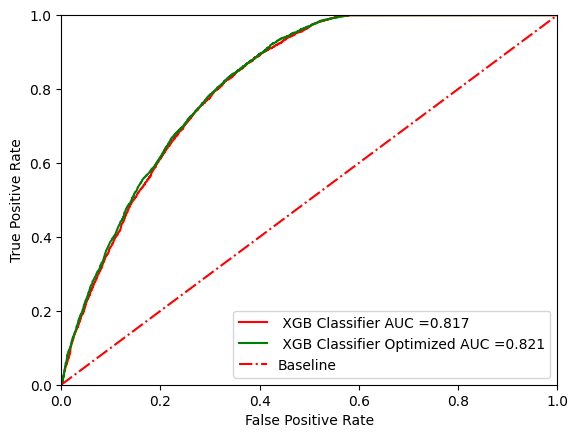

In [28]:
#ROC Curve for xgb model, xgb optimized model, and baseline
fpr_xgb, tpr_xgb, threshold_xgb, auc_xgb = generate_auc_roc_curve(model, X_test, y_test)
fpr_xgbopt, tpr_xgbopt, threshold_xgbopt, auc_xgbopt = generate_auc_roc_curve(xgbopt, X_test, y_test)
fpr_b = [0, 0.5, 1.]
tpr_b = [0, 0.5, 1.]
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

#Plotting the roc curve for xgb , xgb optimized model and baseline
plt.plot(fpr_xgb, tpr_xgb, label=" XGB Classifier AUC =" +str(auc_xgb), 
         linewidth=1.5, color='r')
plt.plot(fpr_xgbopt, tpr_xgbopt, label=" XGB Classifier Optimized AUC =" +str(auc_xgbopt), linewidth=1.5, 
         color='g')
plt.plot(fpr_b, tpr_b, label="Baseline", linestyle='dashdot', linewidth=1.5, color='r')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [29]:
#Best threshold aka Operating point 
#G-mean and best threshold(aka operating point) for xgb classifier model
gmeans_xgb = (tpr_xgb * (1-fpr_xgb))**0.5
# Locating the index of the largest g-mean
ix = np.argmax(gmeans_xgb)
print('For XGB Classifier model the Optimal Index=%d, Best Threshold=%f, G-Mean=%.3f' % (ix, threshold_xgb[ix], gmeans_xgb[ix]))

For XGB Classifier model the Optimal Index=2921, Best Threshold=0.402611, G-Mean=0.742


In [30]:
#G-mean and best threshold(aka operating point) for xgb classifier optimized model
gmeans_xgbopt = (tpr_xgbopt * (1-fpr_xgbopt))**0.5
# Locating the index of the largest g-mean
ix = np.argmax(gmeans_xgbopt)
print('For XGB Classifier optimized model the Optimal Index=%d, Best Threshold=%f, G-Mean=%.3f' % (ix, threshold_xgbopt[ix], gmeans_xgbopt[ix]))

For XGB Classifier optimized model the Optimal Index=2128, Best Threshold=0.428038, G-Mean=0.743


In [33]:
#Calculating the p-value 
# The correct target (class) labels
y_target = y_test
# The class labels predicted by XGB Classifier model
y_model_xgb = model.predict(X_test)
# The class labels predicted by XGB Classifier optimized model
y_model_xgbopt = xgbopt.predict(X_test)

table = mcnemar_table(y_target=y_target, 
                   y_model1=y_model_xgb, 
                   y_model2=y_model_xgbopt)

print(table)
chi2, p = mcnemar(ary=table, corrected=True)
print('The chi-squared value is', round(chi2,3))
print('The p-value is', round(p,3))

[[9549  428]
 [ 479 3152]]
The chi-squared value is 2.756
The p-value is 0.097


In [34]:
#Histogram showing Confidence Intervals
n_bootstraps = 1000
rng_seed = 42  
def bootstrap(clf, X_test, y_true):
    rng = np.random.RandomState(42)
    b_scores = []
    y_pred = clf.predict_proba(X_test)[:,1]
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred), len(y_pred))
        score = roc_auc_score(y_true[indices], y_pred[indices])
        b_scores.append(score)
    return b_scores

In [37]:
#Converting the dataframe by column into numpy array for boostrap indexing
y_true = y_test.to_numpy()
# Calculating the bootstrap scores for XGBoost models
b_scores_xgb = bootstrap(model, X_test, y_true)
b_scores_xgbopt = bootstrap(xgbopt, X_test, y_true)

# Calculating the mean of the histogram
mean_value_xgb = sm.mean(b_scores_xgb)
mean_value_xgbopt = sm.mean(b_scores_xgbopt)
print("The Mean of XGBoost Classifier is ", round(mean_value_xgb, 3))
print("The Mean of Optimized XGBoost Classifier model is ", round(mean_value_xgbopt, 3))

The Mean of XGBoost Classifier is  0.817
The Mean of Optimized XGBoost Classifier model is  0.821


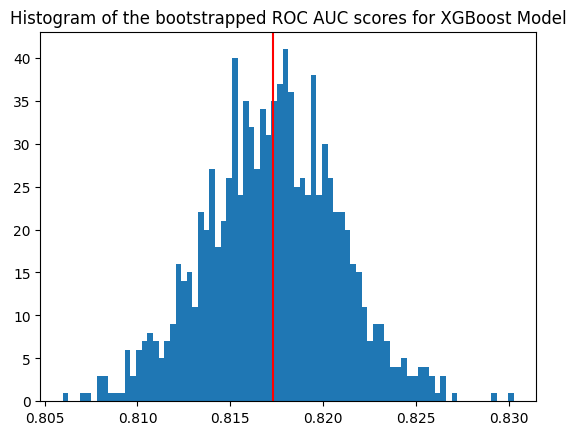

The Confidence interval for AUROC XGBoost Classifier model is [0.810 - 0.824]


In [38]:
# Plotting the histogram plot for XGBoost Classifier model
plt.hist(b_scores_xgb, bins=80)
plt.title('Histogram of the bootstrapped ROC AUC scores for XGBoost Model')
# Showing the line on histogram for Mean value
plt.axvline(x=mean_value_xgb, color='r')
plt.show()

# Computing the confidence interval for AUROC
sorted_scores_xgb = np.array(b_scores_xgb)
sorted_scores_xgb.sort()

# Computing the lower and upper bound of the 95% confidence interval
ci_lower_auroc_xgb = sorted_scores_xgb[int(0.025 * len(sorted_scores_xgb))]
ci_upper_auroc_xgb = sorted_scores_xgb[int(0.975 * len(sorted_scores_xgb))]
print("The Confidence interval for AUROC XGBoost Classifier model is [{:0.3f} - {:0.3f}]".format(ci_lower_auroc_xgb, ci_upper_auroc_xgb))

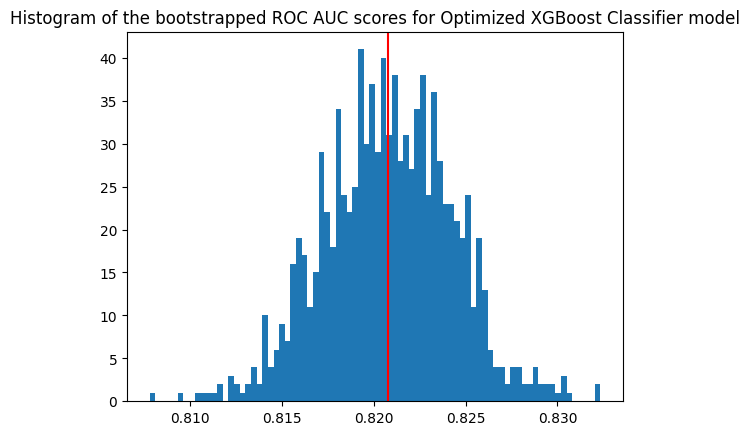

The Confidence interval for AUROC XGBoost Classifier optimized model is [0.814 - 0.828]


In [39]:
# Plotting the histogram plot for Optimized XGBoost Classifier model
plt.hist(b_scores_xgbopt, bins=80)
plt.title('Histogram of the bootstrapped ROC AUC scores for Optimized XGBoost Classifier model')
# Showing the line on histogram for Mean value
plt.axvline(x=mean_value_xgbopt, color='r')
plt.show()

# Computing the confidence interval for AUROC
sorted_scores_xgbopt = np.array(b_scores_xgbopt)
sorted_scores_xgbopt.sort()

# Computing the lower and upper bound of the 95% confidence interval
ci_lower_auroc_xgbopt = sorted_scores_xgbopt[int(0.025 * len(sorted_scores_xgbopt))]
ci_upper_auroc_xgbopt = sorted_scores_xgbopt[int(0.975 * len(sorted_scores_xgbopt))]
print("The Confidence interval for AUROC XGBoost Classifier optimized model is [{:0.3f} - {:0.3f}]".format(ci_lower_auroc_xgbopt, ci_upper_auroc_xgbopt))

In [42]:
xgb_matrix = xgb.DMatrix(X_test, label=y_test)
xgb_model = xgb.train({"eta":1, "max_depth":10, "base_score":0, "lambda":0},xgb_matrix,10)

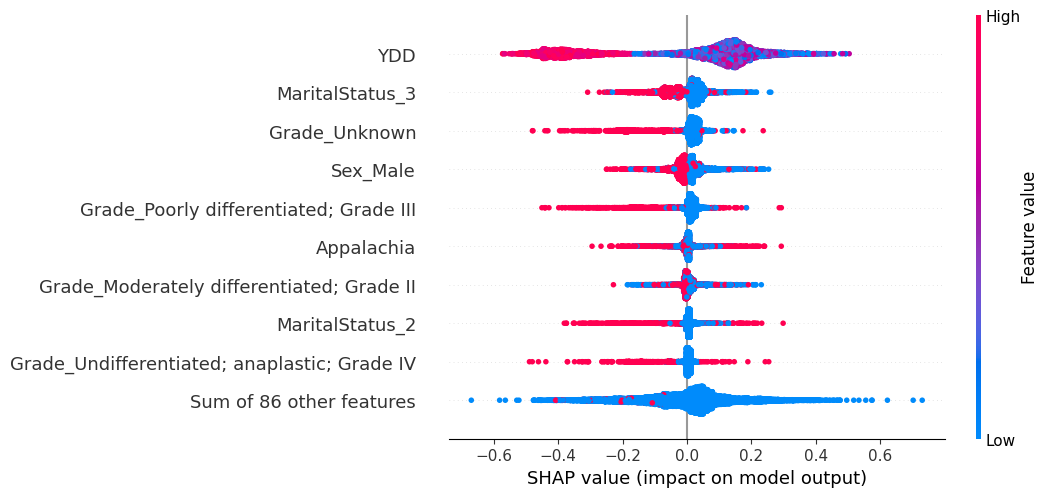

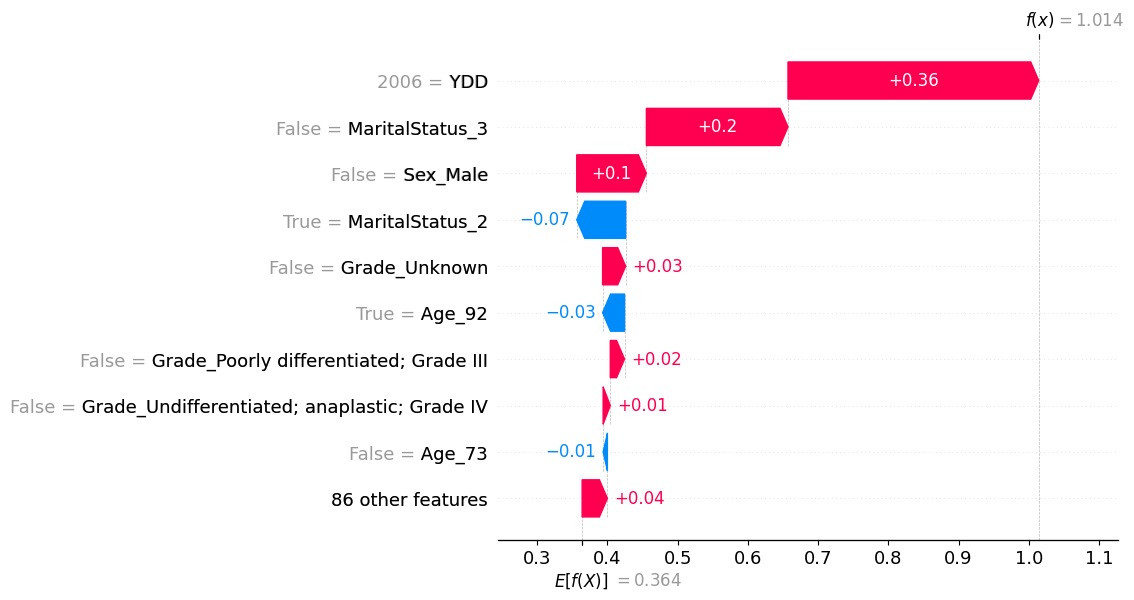

In [43]:
#Generating the SHAP plot for the default model
shap_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = shap_xgb(xgb_matrix)
#Showing the SHAP plot
shap_values_xgb.data = X_test
shap.plots.beeswarm(shap_values_xgb)
shap.plots.waterfall(shap_values_xgb[1])

In [45]:
optimized = {
    "eta": 0.02,
    "max_depth": 10,  # example value, set according to your optimized parameters
    "objective": "binary:logistic",
    "nthread": 1
}
xgbopt_model = xgb.train(optimized, xgb_matrix, 600)  # assuming 600 is the number of boosting rounds

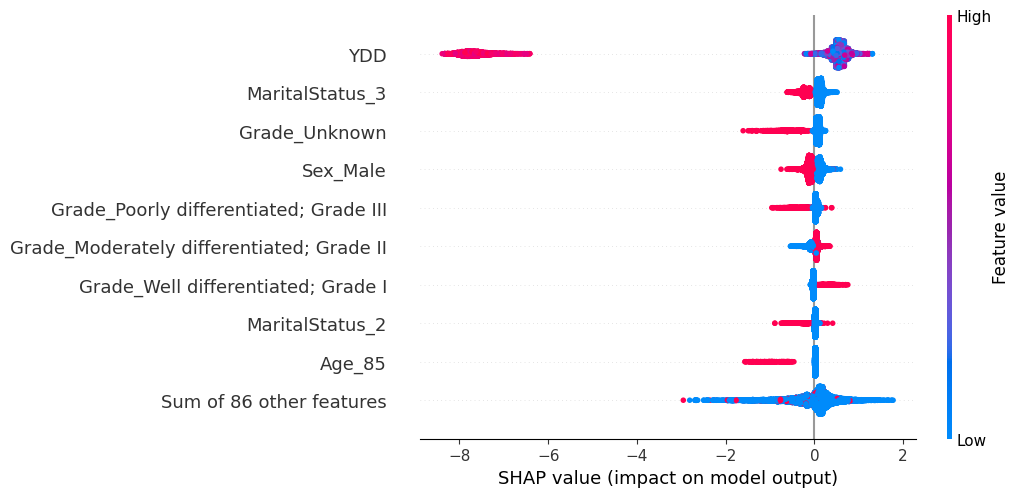

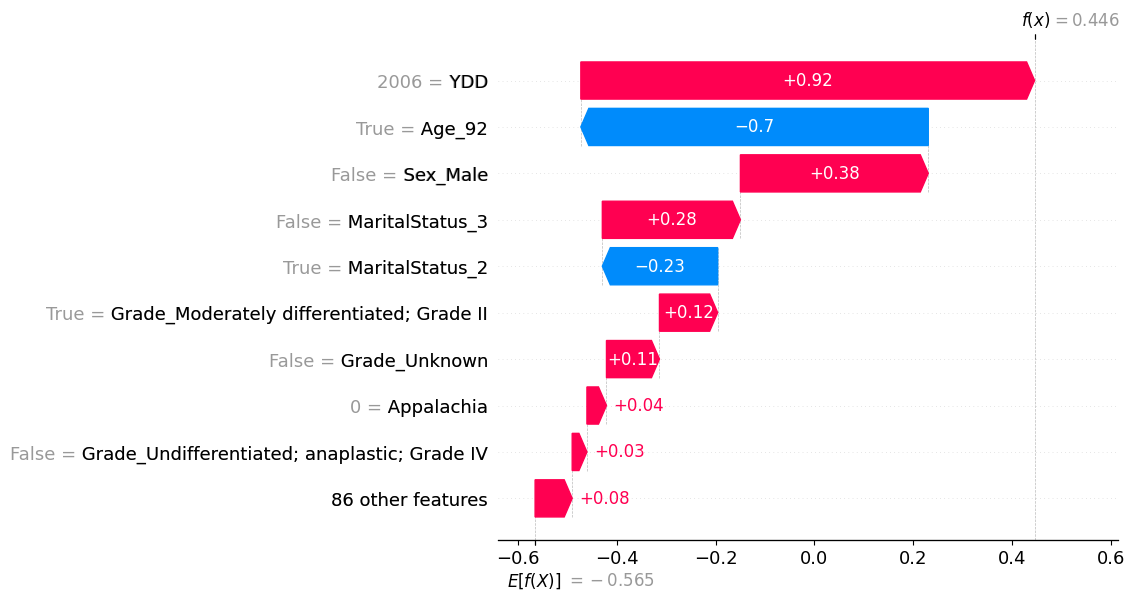

In [49]:
#Generating the SHAP plot for the Optimized model
shap_xgbopt = shap.TreeExplainer(xgbopt_model)
shap_values_xgbopt = shap_xgbopt(xgb_matrix)
#Showing the SHAP plot
shap_values_xgbopt.data = X_test
shap.plots.beeswarm(shap_values_xgbopt)
shap.plots.waterfall(shap_values_xgbopt[1])